In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./outputs/solution_1.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    

run_params = Struct(**run_params)
params = Struct(**params)

# Map the data points to their averages at the center of the grid.

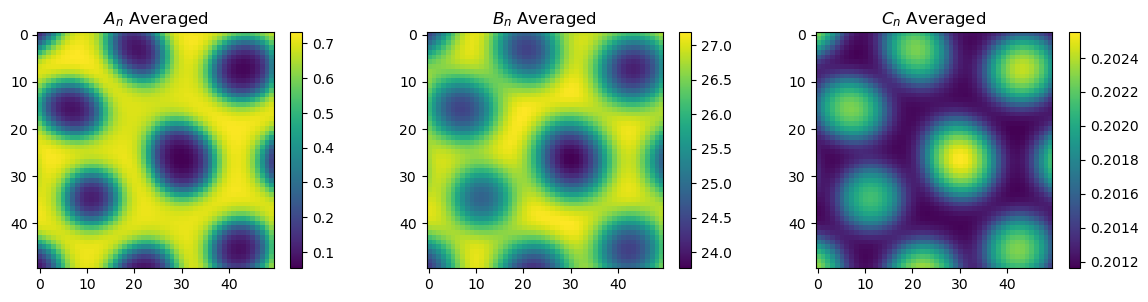

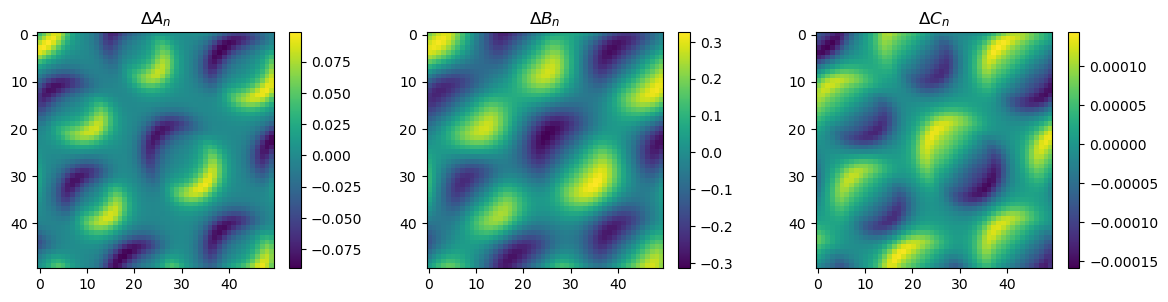

In [4]:
A_n = solution[1, 0, :,:]
B_n = solution[1, 1, :,:]
C_n = solution[1, 2, :,:]

########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


A_n = ndimage.convolve(A_n, kernel)/4
B_n = ndimage.convolve(B_n, kernel)/4
C_n = ndimage.convolve(C_n, kernel)/4


plot_n_im([A_n[40:90, 40:90], B_n[40:90, 40:90], C_n[40:90, 40:90]], 
          [r"$A_{n}$ Averaged", r"$B_{n}$ Averaged", r"$C_{n}$ Averaged"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([A_n[40:90, 40:90]-solution[1, 0, 40:90, 40:90], 
           B_n[40:90, 40:90]-solution[1, 1, 40:90, 40:90], 
           C_n[40:90, 40:90]-solution[1, 2, 40:90, 40:90]], 
          [r"$\Delta A_{n}$", r"$\Delta B_{n}$", r"$\Delta C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

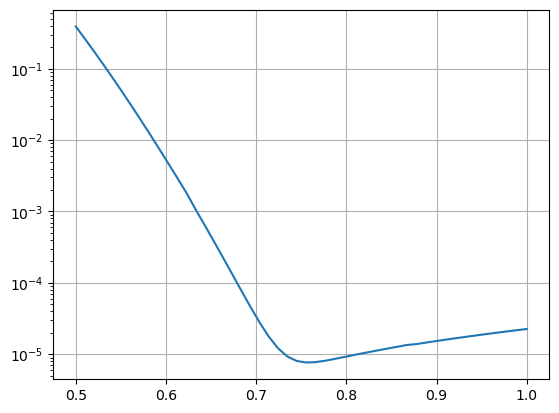

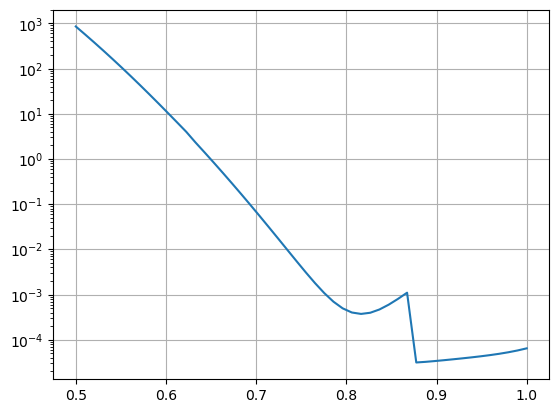

In [5]:
A_n_test2 = grad_diff(A_n)
B_n_test2 = grad_diff(B_n)

ss = np.linspace(5e-1, 1, 50)
stds_A= np.array([ np.mean( (ndimage.gaussian_laplace(A_n, sigma=s)[1:-1, 1:-1]-A_n_test2[1:-1, 1:-1])**2) 
                 for s in ss])
stds_B= np.array([ np.mean( (ndimage.gaussian_laplace(B_n, sigma=s)[1:-1, 1:-1]-B_n_test2[1:-1, 1:-1])**2) 
                 for s in ss])

plt.plot(ss, stds_A);plt.grid();plt.yscale('log');plt.show()
plt.plot(ss, stds_B);plt.grid();plt.yscale('log');plt.show()

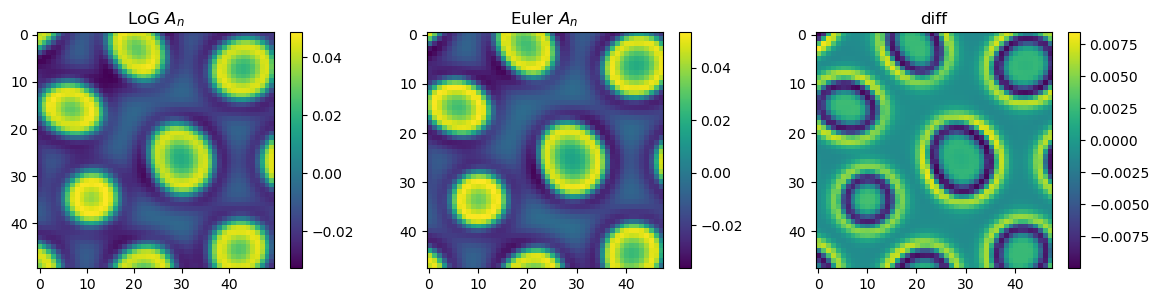

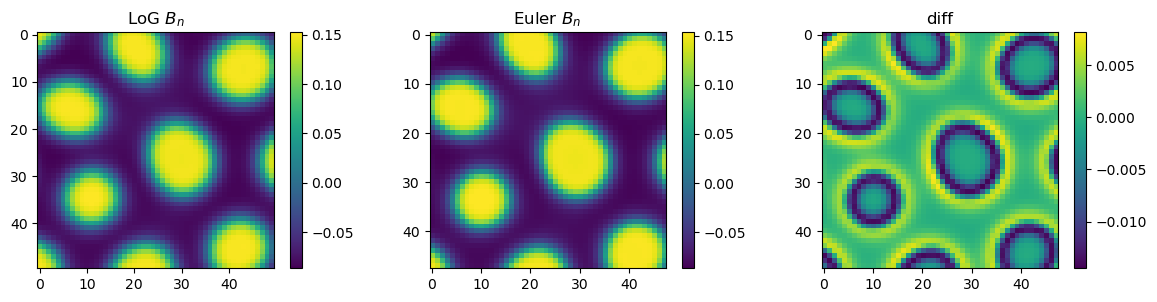

In [6]:
A_n_test = ndimage.gaussian_laplace(A_n, sigma=0.9)[40:90, 40:90]
A_n_test2 = grad_diff(A_n)[40:90, 40:90]

B_n_test = ndimage.gaussian_laplace(B_n, sigma=0.9)[40:90, 40:90]
B_n_test2 = grad_diff(B_n)[40:90, 40:90]
plot_n_im([A_n_test, A_n_test2[1:-1, 1:-1],A_n_test[1:-1, 1:-1]-A_n_test2[1:-1, 1:-1] ], 
          [r"LoG $A_{n}$", r"Euler $A_{n}$ ", "diff"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([B_n_test, B_n_test2[1:-1, 1:-1],B_n_test[1:-1, 1:-1]-B_n_test2[1:-1, 1:-1] ], 
          [r"LoG $B_{n}$", r"Euler $B_{n}$ ", "diff"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

Epoch: 1 
 data loss:0.720037, 
data A loss:0.042767, data B loss:0.677131, data C loss:0.000139, 
Laplacian A loss:16.532428, Laplacian B loss:197.948392




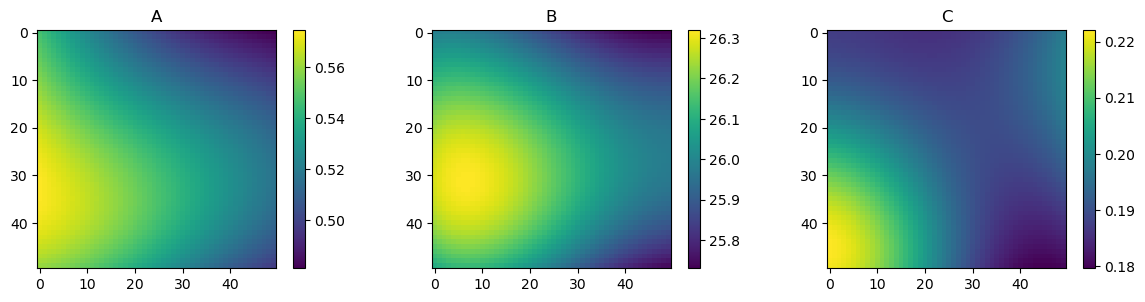

Epoch: 200 
 data loss:0.001266, 
data A loss:0.000465, data B loss:0.000794, data C loss:0.000007, 
Laplacian A loss:0.458884, Laplacian B loss:0.344794




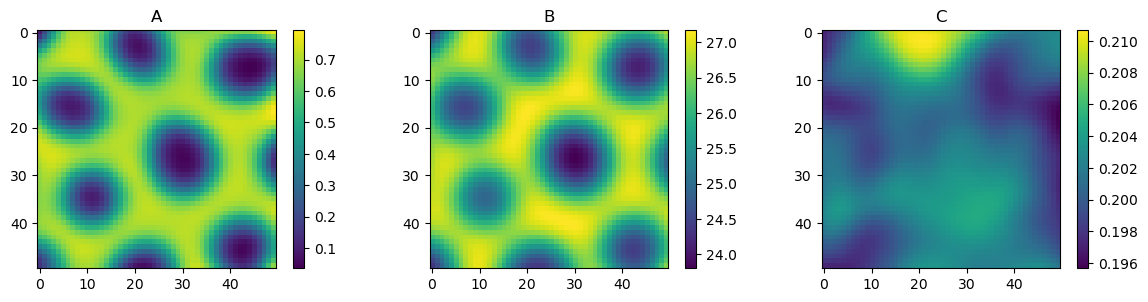

Epoch: 400 
 data loss:0.000584, 
data A loss:0.000111, data B loss:0.000471, data C loss:0.000001, 
Laplacian A loss:0.124590, Laplacian B loss:0.125520




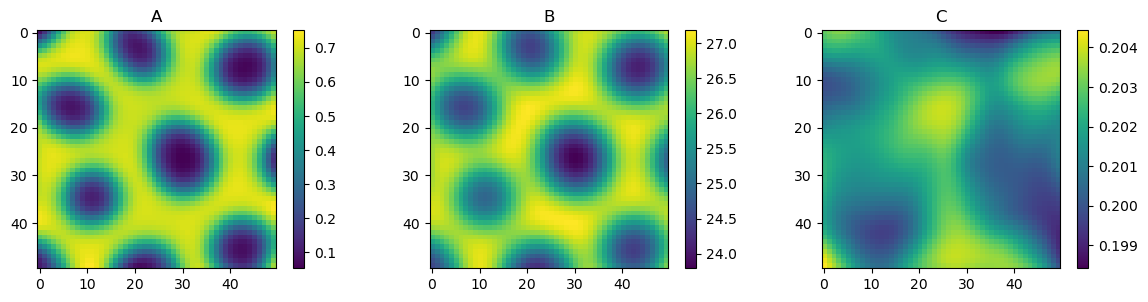

Epoch: 600 
 data loss:0.000505, 
data A loss:0.000094, data B loss:0.000408, data C loss:0.000003, 
Laplacian A loss:0.061825, Laplacian B loss:0.060823




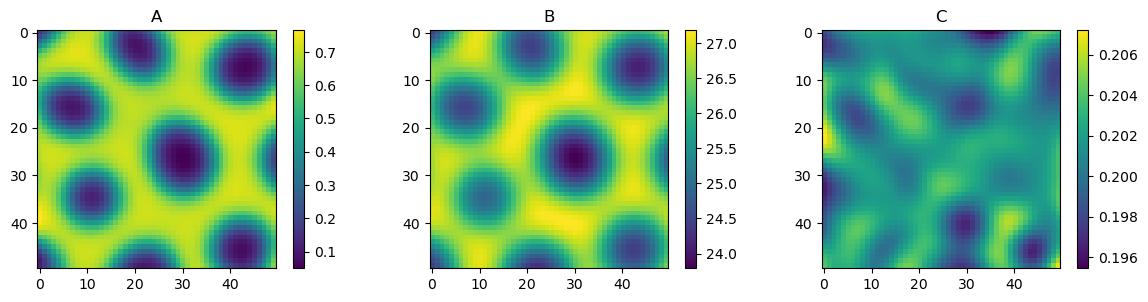

Epoch: 800 
 data loss:0.000465, 
data A loss:0.000078, data B loss:0.000387, data C loss:0.000001, 
Laplacian A loss:0.034873, Laplacian B loss:0.038158




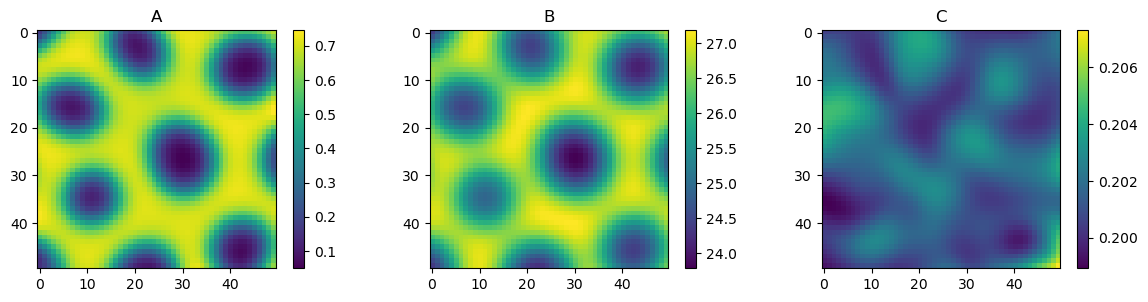

Epoch: 1000 
 data loss:0.000444, 
data A loss:0.000067, data B loss:0.000376, data C loss:0.000000, 
Laplacian A loss:0.022895, Laplacian B loss:0.028000




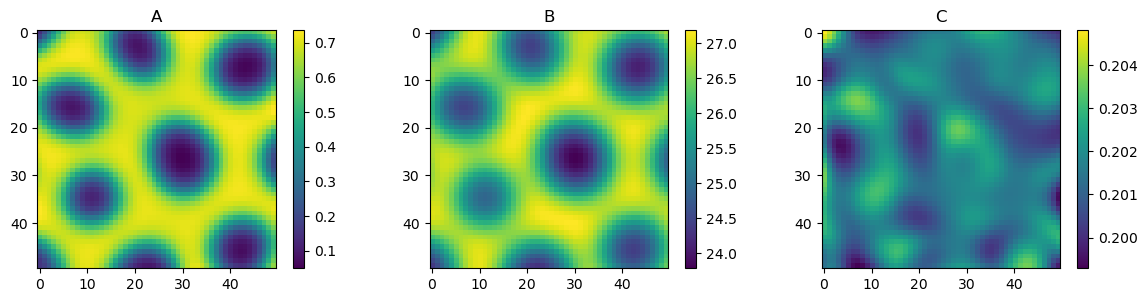

Epoch: 1200 
 data loss:0.000427, 
data A loss:0.000056, data B loss:0.000370, data C loss:0.000000, 
Laplacian A loss:0.016067, Laplacian B loss:0.021028




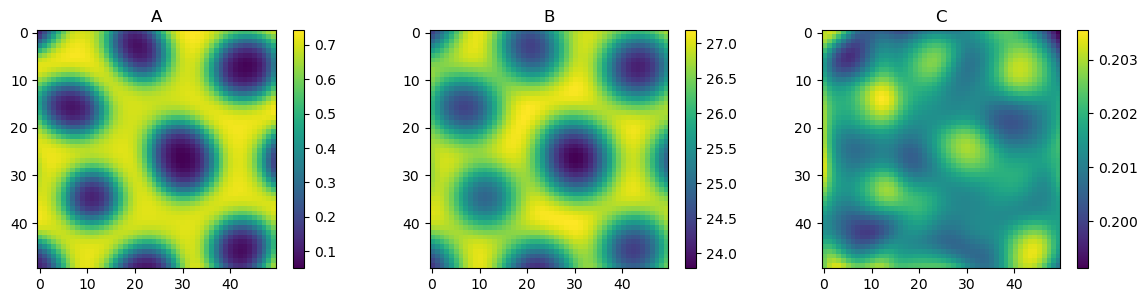

Epoch: 1400 
 data loss:0.000422, 
data A loss:0.000055, data B loss:0.000367, data C loss:0.000000, 
Laplacian A loss:0.014778, Laplacian B loss:0.020421




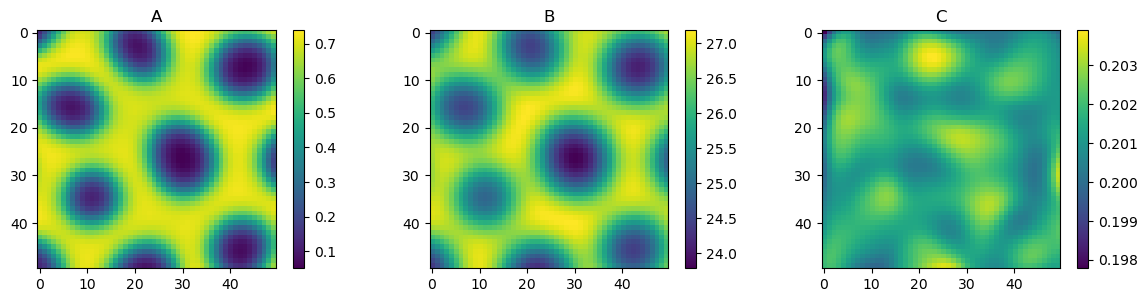

Epoch: 1600 
 data loss:0.000422, 
data A loss:0.000055, data B loss:0.000367, data C loss:0.000000, 
Laplacian A loss:0.014778, Laplacian B loss:0.020421




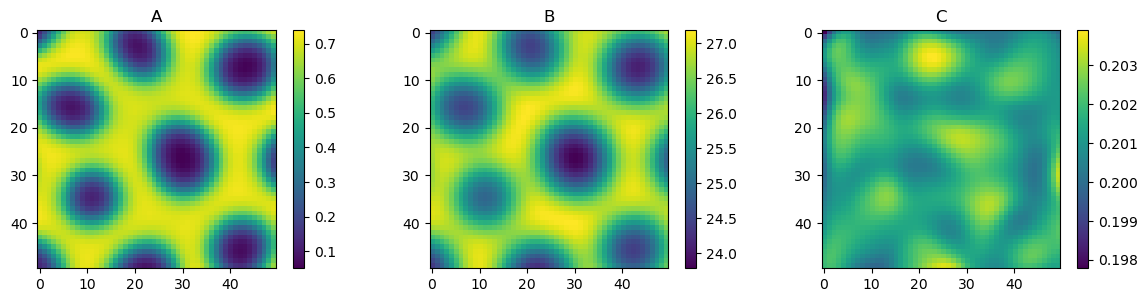

Epoch: 1800 
 data loss:0.000422, 
data A loss:0.000055, data B loss:0.000367, data C loss:0.000000, 
Laplacian A loss:0.014778, Laplacian B loss:0.020421




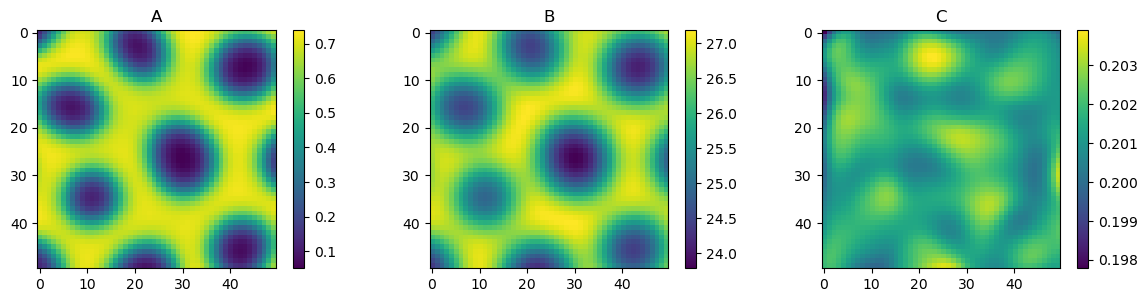

Epoch: 2000 
 data loss:0.000422, 
data A loss:0.000055, data B loss:0.000367, data C loss:0.000000, 
Laplacian A loss:0.014778, Laplacian B loss:0.020421




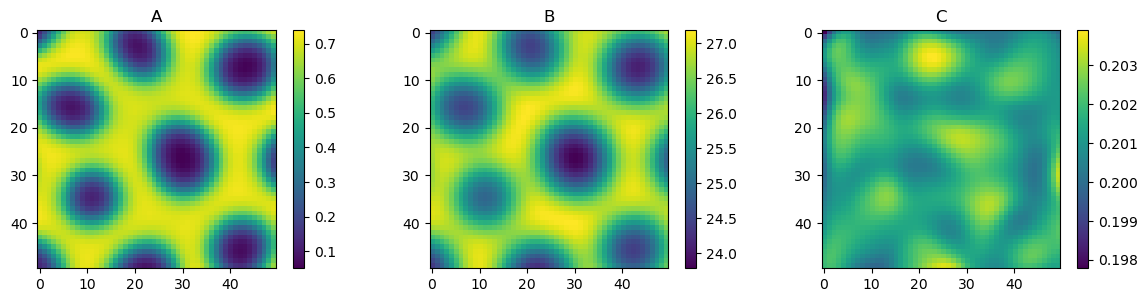

Epoch: 2200 
 data loss:0.000422, 
data A loss:0.000055, data B loss:0.000367, data C loss:0.000000, 
Laplacian A loss:0.014778, Laplacian B loss:0.020421




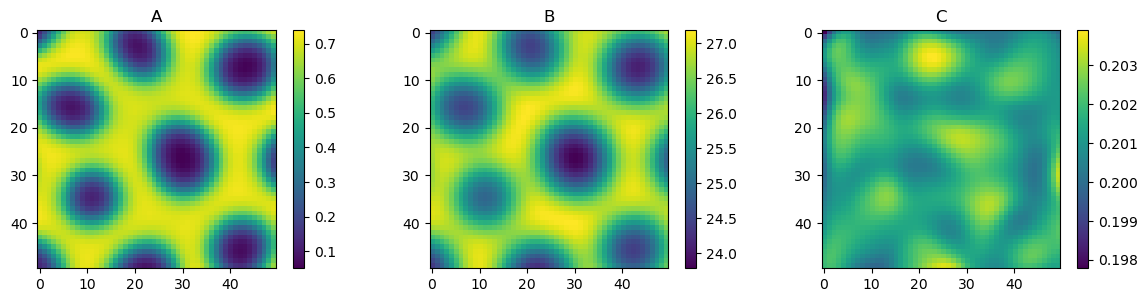

Epoch: 2400 
 data loss:0.000422, 
data A loss:0.000055, data B loss:0.000367, data C loss:0.000000, 
Laplacian A loss:0.014778, Laplacian B loss:0.020421




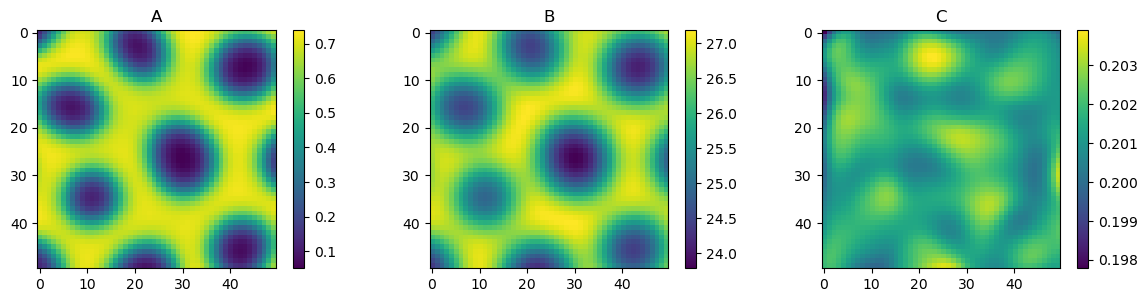

Epoch: 2600 
 data loss:0.000422, 
data A loss:0.000055, data B loss:0.000367, data C loss:0.000000, 
Laplacian A loss:0.014778, Laplacian B loss:0.020421




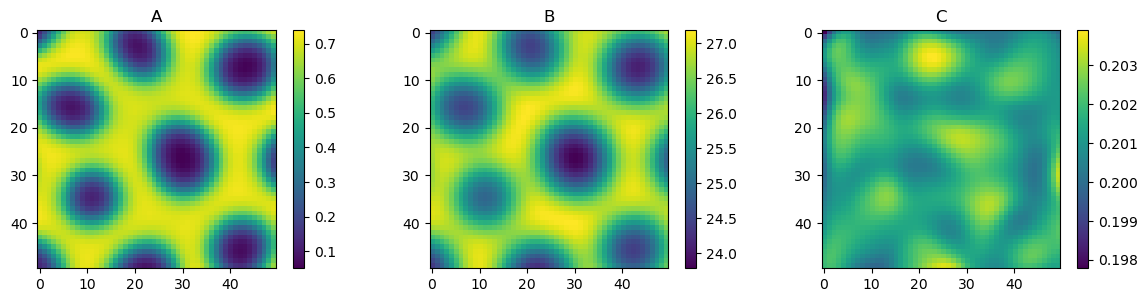

Epoch: 2800 
 data loss:0.000422, 
data A loss:0.000055, data B loss:0.000367, data C loss:0.000000, 
Laplacian A loss:0.014778, Laplacian B loss:0.020421




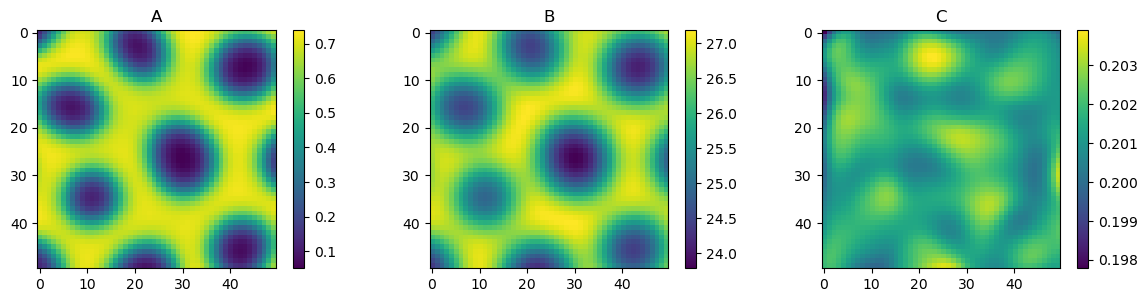

Epoch: 3000 
 data loss:0.000422, 
data A loss:0.000055, data B loss:0.000367, data C loss:0.000000, 
Laplacian A loss:0.014778, Laplacian B loss:0.020421




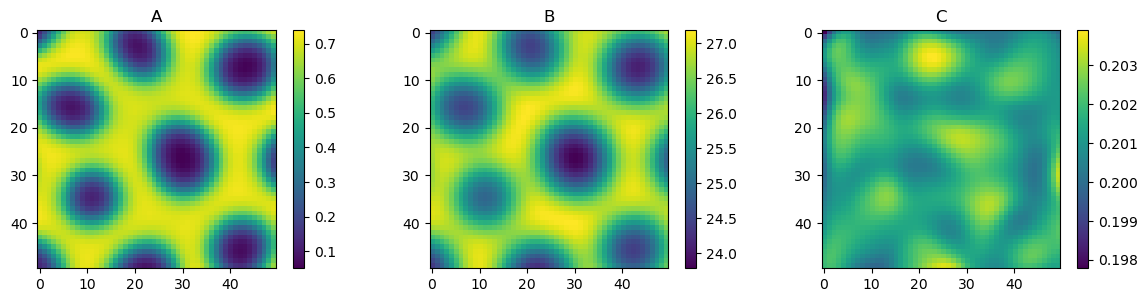

In [7]:
torch.manual_seed(42)
np.random.seed(42)

x = torch.linspace(0, run_params.Lx, run_params.Ix)[40:90].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[40:90].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)

data_A = torch.from_numpy(A_n[40:90, 40:90].flatten()).to(device)
data_B = torch.from_numpy(B_n[40:90, 40:90].flatten()).to(device)
data_C = torch.from_numpy(C_n[40:90, 40:90].flatten()).to(device)


diffusion_scale_factor = (run_params.Ix*run_params.Jy/(run_params.Lx*run_params.Ly))
#diffusion_scale_factor = (50*50/((torch.max(x).item()-torch.min(x).item())*(torch.max(y).item()-torch.min(y).item())))
#####################################
# LoG diffusion
# Remove the boundary effect
laplacianA_actual = torch.tensor(
    diffusion_scale_factor*ndimage.gaussian_laplace(A_n, sigma=0.9)[40:90, 40:90].flatten()
                                ).to(device)
laplacianB_actual = torch.tensor(
    diffusion_scale_factor*ndimage.gaussian_laplace(B_n, sigma=0.9)[40:90, 40:90].flatten()
                                ).to(device)
                   
                   
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_dense_normalised([2, 128, 128, 3], lb, ub).to(device)

optimizer = torch.optim.LBFGS([*model.parameters()], lr=1
                             ,line_search_fn='strong_wolfe')#.Adam([*model.parameters()], lr=1e-3)#


epochs = 3000
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics_laplacian = 1e-2

losses = np.zeros((5, epochs))

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return  km**n / (x**n + km**n)


for i in range(epochs):
    flg_new_call = True
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        # randomly select 1/4th of them
        #random_indices = torch.randperm(data_X.shape[0])[:N]
        data_X_input = data_X#[random_indices,:]
        data_f_hat = model(data_X_input).squeeze() 
        data_A_hat = data_f_hat[:,0]
        data_B_hat = data_f_hat[:,1]
        data_C_hat = data_f_hat[:,2]
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3


        #################################
        # physics derivatives
        # random points
        #physics_X = torch.rand((N,2), requires_grad=True, device=dev_str)*domain_bounds
        #physics_f = model(physics_X).squeeze()
        A = data_A_hat#physics_f[:,0]
        B = data_B_hat#physics_f[:,1]
        C = data_C_hat#physics_f[:,2]

        dxy  = torch.autograd.grad(A, data_X_input, torch.ones_like(A), create_graph=True)[0]# computes dy/dx
        dx, dy = dxy[:,0], dxy[:,1]
        dxy2 = torch.autograd.grad(dx, data_X_input, torch.ones_like(dx), create_graph=True)[0]# computes d^2u/dx^2
        dx2 =  dxy2[:,0]
        dyx2 = torch.autograd.grad(dy, data_X_input, torch.ones_like(dy), create_graph=True)[0]# computes d^2u/dy^2
        dy2 =  dyx2[:,1]
        laplacianA = dx2 + dy2

        dxy  = torch.autograd.grad(B, data_X_input, torch.ones_like(B), create_graph=True)[0]# computes dy/dx
        dx, dy = dxy[:,0], dxy[:,1]
        dxy2 = torch.autograd.grad(dx, data_X_input, torch.ones_like(dx), create_graph=True)[0]# computes d^2u/dx^2
        dx2 =  dxy2[:,0]
        dyx2 = torch.autograd.grad(dy, data_X_input, torch.ones_like(dy), create_graph=True)[0]# computes d^2u/dy^2
        dy2 =  dyx2[:,1]
        laplacianB = dx2 + dy2
        
        
        A_loss_laplacian = torch.mean((laplacianA-laplacianA_actual)**2)
        B_loss_laplacian = torch.mean((laplacianB-laplacianB_actual)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
    def to(arr):
        return arr.reshape(50, 50)
    if (i+1)%200 == 0 or i==0 :
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(losses[0:3,i]):.6f}, \n"
              f"data A loss:{losses[0,i]:.6f}, data B loss:{losses[1,i]:.6f}, data C loss:{losses[2,i]:.6f}, \n"
              f"Laplacian A loss:{losses[3,i]:.6f}, Laplacian B loss:{losses[4,i]:.6f}\n"
              f"\n"
             )
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[:,0]
        data_B_hat = data_f_hat[:,1]
        data_C_hat = data_f_hat[:,2]
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()  
            
    

A diff:5.4768988546007024e-05 B diff:0.0003670101047358212 C diff:4.28979015287523e-07
F_A actual:0.002144033307199742, F_A:0.0021121108438819647, RMSE: 0.0022483491145538705
F_B actual:215.43232678912125, F_B:210.00242614746094, RMSE: 0.4568370042383206
F_C actual:4.338198646300777e-12, F_C:1.0089964064263768e-07, RMSE: 0.00031740863369998396

Laplacian A RMSE: 0.6904419576628991
Laplacian B RMSE: 0.9607369076650212

dAdt RMSE: 0.00832091137448335
dBdt RMSE: 1.3241328274922493
dCdt RMSE: 0.00031740863369998396


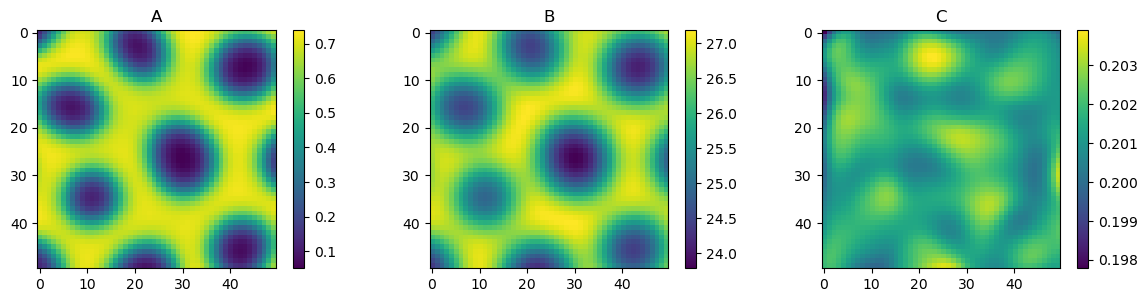

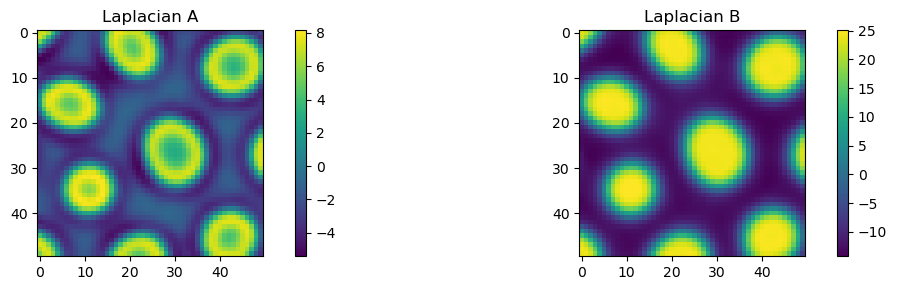

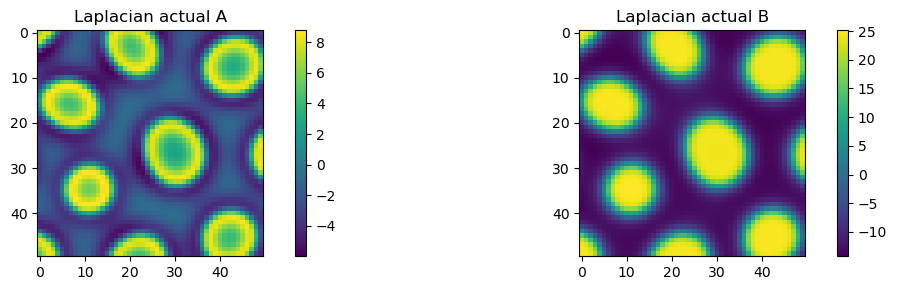

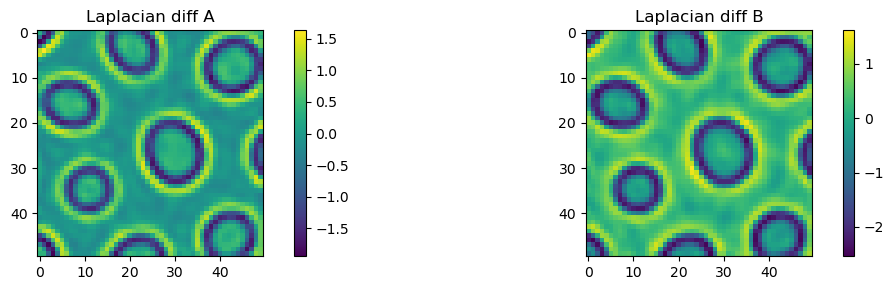

In [8]:
physics_f = model(data_X).squeeze()
A = physics_f[:,0]
B = physics_f[:,1]
C = physics_f[:,2]
dxy  = torch.autograd.grad(A, data_X, torch.ones_like(A), create_graph=True)[0]# computes dy/dx
dx, dy = dxy[:,0], dxy[:,1]
dxy2 = torch.autograd.grad(dx, data_X, torch.ones_like(dx), create_graph=True)[0]# computes d^2u/dx^2
dx2 =  dxy2[:,0]
dyx2 = torch.autograd.grad(dy, data_X, torch.ones_like(dy), create_graph=True)[0]# computes d^2u/dy^2
dy2 =  dyx2[:,1]
laplacianA = dx2 + dy2

dxy  = torch.autograd.grad(B, data_X, torch.ones_like(B), create_graph=True)[0]# computes dy/dx
dx, dy = dxy[:,0], dxy[:,1]
dxy2 = torch.autograd.grad(dx, data_X, torch.ones_like(dx), create_graph=True)[0]# computes d^2u/dx^2
dx2 =  dxy2[:,0]
dyx2 = torch.autograd.grad(dy, data_X, torch.ones_like(dy), create_graph=True)[0]# computes d^2u/dy^2
dy2 =  dyx2[:,1]
laplacianB = dx2 + dy2

A = A.cpu().detach().numpy().reshape((50,50))
B = B.cpu().detach().numpy().reshape((50,50))
C = C.cpu().detach().numpy().reshape((50,50))
laplacianA = laplacianA.cpu().detach().numpy().reshape((50,50))#[1:-1, 1:-1]
laplacianB = laplacianB.cpu().detach().numpy().reshape((50,50))#[1:-1, 1:-1]

A_actual = A_n[40:90, 40:90]
B_actual = B_n[40:90, 40:90]
C_actual = C_n[40:90, 40:90]

laplacianA2 = diffusion_scale_factor* grad_diff(A_n)[40:90, 40:90]
laplacianB2 = diffusion_scale_factor* grad_diff(B_n)[40:90, 40:90]

n = params["n"]

F_C =  params["b_C"] + params["V_C"]*inh(A_actual, params["K_AC"], n)*inh(B_actual, params["K_BC"], n)*act(C_actual, params["K_CC"], n) - params["mu_C"] * C_actual
F_C2 =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_A =  params["b_A"] + params["V_A"]*act(A_actual, params["K_AA"], n)*inh(B_actual, params["K_BA"], n) - params["mu_A"] * A_actual
F_A2 =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_B =  params["b_B"] + params["V_B"]*act(A_actual, params["K_AB"], n)*inh(C_actual, params["K_CB"], n) - params["mu_B"] * B_actual
F_B2 =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B

dAdt_actual = params["D_A"]*laplacianA+F_A
dAdt = params["D_A"]*laplacianA2+F_A2
dBdt_actual = params["D_B"]*laplacianB+F_B
dBdt = params["D_B"]*laplacianB2+F_B2

print(f"A diff:{np.mean((A-A_actual)**2)}",
      f"B diff:{np.mean((B-B_actual)**2)}",
      f"C diff:{np.mean((C-C_actual)**2)}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A2**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A2)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B2**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B2)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C2**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C2)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA-laplacianA2)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB-laplacianB2)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt_actual-dAdt)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt_actual-dBdt)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C2)**2))}")

plot_n_im([A, B, C], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA, laplacianB], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA2, laplacianB2], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA-laplacianA2, laplacianB-laplacianB2], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

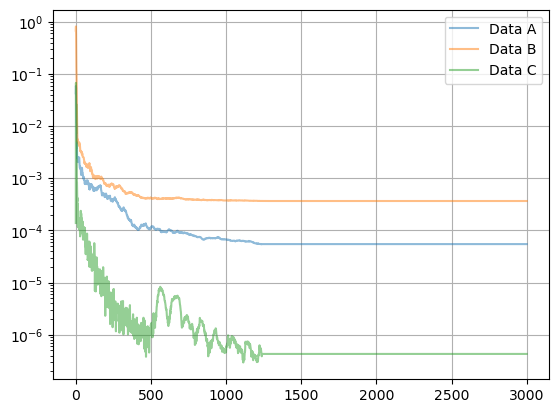

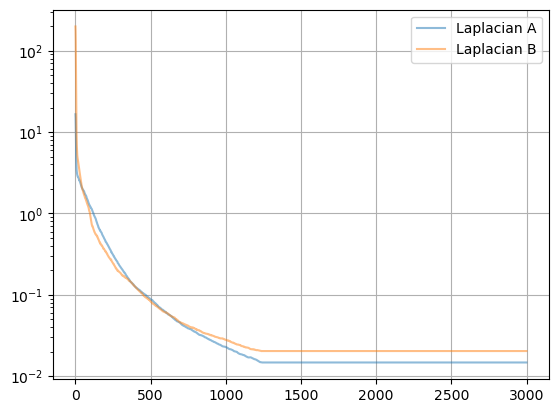

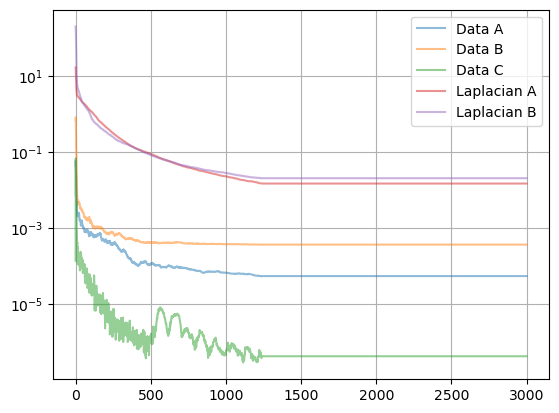

In [9]:
plt.plot(losses[0,:], alpha=.5, label="Data A")
plt.plot(losses[1,:], alpha=.5, label="Data B")
plt.plot(losses[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(losses[3,:], alpha=.5, label="Laplacian A")
plt.plot(losses[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(losses[0,:], alpha=.5, label="Data A")
plt.plot(losses[1,:], alpha=.5, label="Data B")
plt.plot(losses[2,:], alpha=.5, label="Data C")
plt.plot(losses[3,:], alpha=.5, label="Laplacian A")
plt.plot(losses[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


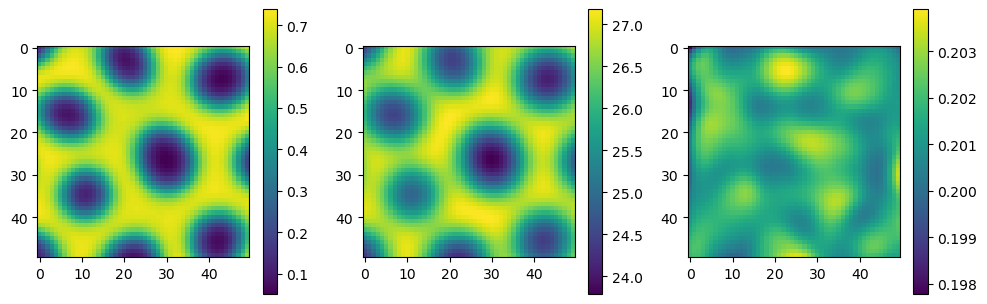

In [10]:
solution_hat = model(data_X).cpu().detach()
A_hat = solution_hat[:, 0].numpy().reshape((50,50))
B_hat = solution_hat[:, 1].numpy().reshape((50,50))
C_hat = solution_hat[:, 2].numpy().reshape((50,50))
index = -1
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

5.4768988546007024e-05
0.0003670101047358212
4.28979015287523e-07


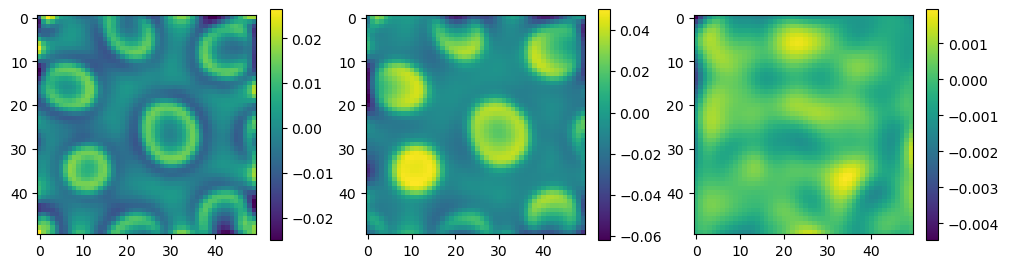

In [11]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A_n[40:90, 40:90])
print(np.mean((A_hat-A_n[40:90, 40:90])**2))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B_n[40:90, 40:90])
print(np.mean((B_hat-B_n[40:90, 40:90])**2))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C_n[40:90, 40:90])
print(np.mean((C_hat-C_n[40:90, 40:90])**2))
plt.colorbar(shrink=.75)
plt.show()

In [57]:
def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str))
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str))


D_A=params["D_A"]#, sampled_D_A, sampled_D_A_grad = create_var()
D_B=params["D_B"]#, sampled_D_B, sampled_D_B_grad = create_var()
b_A = create_var()
b_B = create_var()
b_C = create_var()
V_A = create_var()
V_B = create_var()
V_C = create_var()
mu_A = create_var()
mu_B = create_var()
mu_C=params["D_A"]#, sampled_mu_C, sampled_mu_C_grad = create_var()
K_AA = create_var()
K_AB = create_var()
K_AC = create_var()
K_BA = create_var()
K_BC = create_var()
K_CB = create_var()
K_CC = create_var()
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

params_name_list2 = [#"D_A", "D_B", 
                    "b_A", "b_B", "V_A", "V_B", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_BA", 
]

params_list2 = [#D_A, D_B, 
               b_A, b_B, V_A, V_B, mu_A, mu_B, #mu_C,
               K_AA, K_AB,  K_BA,
]


In [58]:
   
def physics_loss():            
    #physics_X = torch.rand((N,2), requires_grad=True, device=dev_str)*domain_bounds
    #physics_f = model(physics_X).squeeze()
    physics_f = model(data_X).squeeze()
    A = physics_f[:,0]
    B = physics_f[:,1]
    C = physics_f[:,2]

    dxy  = torch.autograd.grad(A, data_X, torch.ones_like(A), create_graph=True)[0]# computes dy/dx
    dx, dy = dxy[:,0], dxy[:,1]
    dxy2 = torch.autograd.grad(dx, data_X, torch.ones_like(dx), create_graph=True)[0]# computes d^2u/dx^2
    dx2 =  dxy2[:,0]
    dyx2 = torch.autograd.grad(dy, data_X, torch.ones_like(dy), create_graph=True)[0]# computes d^2u/dy^2
    dy2 =  dyx2[:,1]
    laplacianA = dx2 + dy2

    dxy  = torch.autograd.grad(B, data_X, torch.ones_like(B), create_graph=True)[0]# computes dy/dx
    dx, dy = dxy[:,0], dxy[:,1]
    dxy2 = torch.autograd.grad(dx, data_X, torch.ones_like(dx), create_graph=True)[0]# computes d^2u/dx^2
    dx2 =  dxy2[:,0]
    dyx2 = torch.autograd.grad(dy, data_X, torch.ones_like(dy), create_graph=True)[0]# computes d^2u/dy^2
    dy2 =  dyx2[:,1]
    laplacianB = dx2 + dy2
    # To make sure the parameters stay positive, we use the exponential function    
    e = torch.exp
    F_A =  e(b_A) + e(V_A)*act(A, e(K_AA), n)*inh(B, e(K_BA), n) - e(mu_A) * A
    #f_A =  e(b_A)/(e(D_A)+1e-6) + e(V_A)*act(A, e(K_AA), n)*inh(B, e(K_BA), n)/(e(D_A)+1e-6) - e(mu_A)*A/(e(D_A)+1e-6)
    F_B =  e(b_B) + e(V_B)*act(A, e(K_AB), n)*inh(C, e(K_CB), n) - e(mu_B) * B
    #f_B =  e(b_B)/(e(D_B)+1e-6) + e(V_B)*act(A, e(K_AB), n)*inh(C, e(K_CB), n)/(e(D_B)+1e-6) - e(mu_B)*B/(e(D_B)+1e-6)
    F_C =  e(b_C) + e(V_C)*inh(A, e(K_AC), n)*inh(B, e(K_BC), n)*act(C, e(K_CC), n) - mu_C * C

    
    #dAdt = e(D_A) * laplacianA + F_A
    dAdt = D_A * laplacianA + F_A
    #dAdt2 = laplacianA + f_A
    #dBdt = e(D_B) * laplacianB + F_B
    dBdt = D_B * laplacianB + F_B
    #dBdt2 = laplacianB + f_B
    dCdt = F_C
    ################################
    # physics loss
    # Construct the physics loss here
    A_loss_physics = torch.mean(dAdt**2)
    #A2_loss_physics = torch.mean(dAdt2**2)
    B_loss_physics = torch.mean(dBdt**2)
    #B2_loss_physics = torch.mean(dBdt2**2)
    C_loss_physics = torch.mean(dCdt**2)
    return (A_loss_physics #+ A2_loss_physics 
                    + B_loss_physics #+ B2_loss_physics 
                    + C_loss_physics)

def physics_loss2():            
    #physics_X = torch.rand((N,2), requires_grad=True, device=dev_str)*domain_bounds
    #physics_f = model(physics_X).squeeze()
    physics_f = model(data_X).squeeze()
    A = physics_f[:,0]
    B = physics_f[:,1]
    

    dxy  = torch.autograd.grad(A, data_X, torch.ones_like(A), create_graph=True)[0]# computes dy/dx
    dx, dy = dxy[:,0], dxy[:,1]
    dxy2 = torch.autograd.grad(dx, data_X, torch.ones_like(dx), create_graph=True)[0]# computes d^2u/dx^2
    dx2 =  dxy2[:,0]
    dyx2 = torch.autograd.grad(dy, data_X, torch.ones_like(dy), create_graph=True)[0]# computes d^2u/dy^2
    dy2 =  dyx2[:,1]
    laplacianA = dx2 + dy2

    dxy  = torch.autograd.grad(B, data_X, torch.ones_like(B), create_graph=True)[0]# computes dy/dx
    dx, dy = dxy[:,0], dxy[:,1]
    dxy2 = torch.autograd.grad(dx, data_X, torch.ones_like(dx), create_graph=True)[0]# computes d^2u/dx^2
    dx2 =  dxy2[:,0]
    dyx2 = torch.autograd.grad(dy, data_X, torch.ones_like(dy), create_graph=True)[0]# computes d^2u/dy^2
    dy2 =  dyx2[:,1]
    laplacianB = dx2 + dy2
    # To make sure the parameters stay positive, we use the exponential function    
    e = torch.exp
    F_A =  e(b_A) + e(V_A)*act(A, e(K_AA), n)*inh(B, e(K_BA), n) - e(mu_A) * A
    #f_A =  e(b_A)/(e(D_A)+1e-6) + e(V_A)*act(A, e(K_AA), n)*inh(B, e(K_BA), n)/(e(D_A)+1e-6) - e(mu_A)*A/(e(D_A)+1e-6)
    F_B =  e(b_B) + e(V_B)*act(A, e(K_AB), n) - e(mu_B) * B
    #f_B =  e(b_B)/(e(D_B)+1e-6) + e(V_B)*act(A, e(K_AB), n)*inh(C, e(K_CB), n)/(e(D_B)+1e-6) - e(mu_B)*B/(e(D_B)+1e-6)
    
    
    #dAdt = e(D_A) * laplacianA + F_A
    dAdt = D_A * laplacianA + F_A
    #dAdt2 = laplacianA + f_A
    #dBdt = e(D_B) * laplacianB + F_B
    dBdt = D_B * laplacianB + F_B
    
    ################################
    # physics loss
    # Construct the physics loss here
    A_loss_physics = torch.mean(dAdt**2)
    #A2_loss_physics = torch.mean(dAdt2**2)
    B_loss_physics = torch.mean(dBdt**2)
    #B2_loss_physics = torch.mean(dBdt2**2)
    return (A_loss_physics #+ A2_loss_physics 
                    + B_loss_physics )



optimizer2 = torch.optim.Adam(params_list2,
                                lr=.001,weight_decay=0.001)#.LBFGS(params_list2,
#                                lr=.8,
#                                history_size=10, 
#                                max_iter=20, 
#                                line_search_fn="strong_wolfe")

# L-BFGS
def closure():
    if torch.is_grad_enabled():
        optimizer2.zero_grad()
    loss = physics_loss2()
    if loss.requires_grad:
        loss.backward()
    return loss

history_lbfgs = []
stored_parameters = np.zeros(len(params_list2))
for i in range(40000):
    history_lbfgs.append(physics_loss2().item())
    if np.all([not np.isnan(p.item()) for p in params_list2]):
        stored_parameters = [np.exp(p.item()) for p in params_list2]
    else:
        print("Nan -- (maybe large learning rate)")
        break
        
    if i%400 ==0:
        print(history_lbfgs[-1],", ".join([f"{name}={np.exp(l.item()):.4f}" 
                 for l, name in zip(params_list2, params_name_list2)]))
        print()
    optimizer2.step(closure)
#     optimizer2.zero_grad()
#     loss = physics_loss()
#     loss.backward()
#     optimizer2.step()



4831.30908203125 b_A=2.7183, b_B=2.7183, V_A=2.7183, V_B=2.7183, mu_A=2.7183, mu_B=2.7183, K_AA=2.7183, K_AB=2.7183, K_BA=2.7183

2338.81005859375 b_A=2.0824, b_B=4.0579, V_A=1.8925, V_B=5.0326, mu_A=3.4550, mu_B=1.9389, K_AA=1.8914, K_AB=1.4717, K_BA=1.8932

843.6005249023438 b_A=1.8371, b_B=6.0307, V_A=1.4365, V_B=14.8090, mu_A=3.2402, mu_B=1.5342, K_AA=1.4350, K_AB=0.5509, K_BA=1.4375

89.63751983642578 b_A=1.6282, b_B=7.8690, V_A=1.1917, V_B=29.5571, mu_A=2.8745, mu_B=1.3655, K_AA=1.1904, K_AB=0.3677, K_BA=1.1925

18.142223358154297 b_A=1.4394, b_B=8.4283, V_A=1.0713, V_B=37.3076, mu_A=2.5394, mu_B=1.3311, K_AA=1.0704, K_AB=0.3616, K_BA=1.0718

9.591114044189453 b_A=1.2740, b_B=8.4473, V_A=1.0210, V_B=40.1415, mu_A=2.2460, mu_B=1.3290, K_AA=1.0204, K_AB=0.3938, K_BA=1.0214

4.749499797821045 b_A=1.1308, b_B=8.4382, V_A=1.0046, V_B=42.5885, mu_A=1.9918, mu_B=1.3286, K_AA=1.0042, K_AB=0.4242, K_BA=1.0049

2.3401551246643066 b_A=1.0067, b_B=8.4353, V_A=1.0007, V_B=44.7564, mu_A=1.7716

0.46421465277671814 b_A=0.0869, b_B=0.3037, V_A=1.0000, V_B=48.5072, mu_A=0.1466, mu_B=0.9792, K_AA=1.0000, K_AB=0.4993, K_BA=1.0001

0.4640559256076813 b_A=0.0869, b_B=0.2795, V_A=1.0000, V_B=48.5034, mu_A=0.1466, mu_B=0.9783, K_AA=1.0000, K_AB=0.4993, K_BA=1.0001

0.46392375230789185 b_A=0.0869, b_B=0.2609, V_A=1.0000, V_B=48.5029, mu_A=0.1466, mu_B=0.9775, K_AA=0.9999, K_AB=0.4993, K_BA=1.0001

0.46382951736450195 b_A=0.0869, b_B=0.2471, V_A=1.0000, V_B=48.5010, mu_A=0.1466, mu_B=0.9770, K_AA=1.0000, K_AB=0.4993, K_BA=1.0001

0.4637620747089386 b_A=0.0869, b_B=0.2372, V_A=1.0000, V_B=48.5004, mu_A=0.1466, mu_B=0.9766, K_AA=1.0000, K_AB=0.4993, K_BA=1.0000

0.46371692419052124 b_A=0.0869, b_B=0.2305, V_A=1.0000, V_B=48.4997, mu_A=0.1466, mu_B=0.9763, K_AA=1.0000, K_AB=0.4993, K_BA=1.0001

0.4636881947517395 b_A=0.0869, b_B=0.2263, V_A=1.0000, V_B=48.4993, mu_A=0.1466, mu_B=0.9761, K_AA=1.0000, K_AB=0.4993, K_BA=1.0001

0.46367183327674866 b_A=0.0869, b_B=0.2239, V_A=1.0000, V_B=48.49

In [ ]:
'b_A': 0.001,'b_B':0.001,'b_C': 0.1,'V_A': 25.0,'V_B':50.0,'V_C':25.0, 'mu_A':0.5,'mu_B':1.0,
'K_AA': 0.5,'K_AB':0.5,'K_AC':1.0,'K_BA':10.0,'K_BC': 10.0,'K_CB':1.0,'K_CC':1.0

In [14]:
estimated_params = dict()
index = -1#np.argmin(np.sum(losses, axis=0)[20:])# + losses.shape[1]
#for l, name in zip(params_list, params_name_list):    
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = np.exp(l.item())#np.mean(np.exp(l[50000:]))#

In [15]:
estimated_params

{'b_A': 0.2163003089382189,
 'b_B': 0.036474088542232115,
 'b_C': 0.022544272494282844,
 'V_A': 2.7182847448606196,
 'V_B': 3457195.553166615,
 'V_C': 2.718281828459045,
 'mu_A': 0.3921111096859109,
 'mu_B': 0.667154677391715,
 'K_AA': 2.718266436391459,
 'K_AB': 12.559693810434402,
 'K_AC': 2.718281828459045,
 'K_BA': 2.718296410498208,
 'K_BC': 2.7182816664368272,
 'K_CB': 2.7229907036485725,
 'K_CC': 2.718281828459045}

In [22]:
estimated_params

{'b_A': 0.00021702826079595365,
 'b_B': 0.695858461658684,
 'b_C': 0.05044429869244804,
 'V_A': 2.7182850689054323,
 'V_B': 43.46164040699536,
 'V_C': 2.718281828459045,
 'mu_A': 0.038959892147019205,
 'mu_B': 0.9605178120696668,
 'K_AA': 2.718259631505152,
 'K_AB': 0.45240890872483647,
 'K_AC': 2.718281828459045,
 'K_BA': 2.7183054838064993,
 'K_BC': 2.7182815044146187,
 'K_CB': 2.7194071436389655,
 'K_CC': 2.71828215250351}

In [16]:
import pickle

torch.save(model.state_dict(), "./outputs/model_LBFGS_Field_only_non_stationary_LoG")
with open('./outputs/model_LBFGS_Field_only_non_stationary_LoG_params_name_list.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./outputs/model_LBFGS_Field_only_non_stationary_LoG_losses.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./outputs/model_LBFGS_Field_only_non_stationary_LoG_estimated_params.pkl", "wb") as f:
    pickle.dump((dict(params), dict(estimated_params)), f) 